In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy.special
from scipy.optimize import minimize
import json
import subprocess
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 2次元ベジェ曲線用
def bezier_general(t, coeffs):
    degree = len(coeffs) - 1
    val = 0
    for j, p in enumerate(coeffs):
        val += scipy.special.comb(degree, j) * (1 - t)**(degree - j) * t**j * p
    return val


def cubic_bezier_point(p0, p1, p2, p3, t):
    p0 = np.array(p0)
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
    return (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * p1 + 3 * (1 - t) * t**2 * p2 + t**3 * p3


def plot_combined(cubic_beziers):
    fig = plt.figure(figsize=(10, 10))
    t_values = np.linspace(0, 1, 300)
    for i, cubic in enumerate(cubic_beziers):
        curve = [cubic_bezier_point(*cubic, t) for t in t_values]
        ctrl_x = [p[0] for p in cubic]
        ctrl_y = [p[1] for p in cubic]
        plt.plot(*zip(*curve), 'orange', ls='--', alpha=0.8, label='3次ベジェ' if i == 0 else None)
        plt.plot(ctrl_x, ctrl_y, 'cyan', marker='o', ls=':', alpha=0.5, label='3次制御点' if i == 0 else None)

    plt.title('高次ベジェ曲線と分割された3次ベジェ近似')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    # 縮尺を合わせる
    plt.axis('equal')
    plt.show()

In [3]:
# 3次ベジェ曲線をプロットする
def plot_3d_bezier(cubic_beziers):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    t_values = np.linspace(0, 1, 300)
    
    for i, cubic in enumerate(cubic_beziers):
        curve = [cubic_bezier_point(*cubic, t) for t in t_values]
        ctrl_x = [p[0] for p in cubic]
        ctrl_y = [p[1] for p in cubic]
        ctrl_z = [p[2] for p in cubic]
        
        ax.plot(*zip(*curve), color='orange', ls='--', alpha=0.8, label='3次ベジェ' if i == 0 else None)
        ax.scatter(ctrl_x, ctrl_y, ctrl_z, color='cyan', marker='o', s=50, alpha=0.5, label='3次制御点' if i == 0 else None)

    ax.set_title('3次元ベジェ曲線と制御点')
    ax.set_xlabel('X軸')
    ax.set_ylabel('Y軸')
    ax.set_zlabel('Z軸')
    ax.grid()
    ax.legend()
    plt.tight_layout()
    plt.show()

2d.swift:84:5: warning: 'cblas_dgemm' was deprecated in macOS 13.3: An updated CBLAS interface supporting ILP64 is available.  Please compile with -DACCELERATE_NEW_LAPACK to access the new headers and -DACCELERATE_LAPACK_ILP64 for ILP64 support.
 82 |     // A^T A
 83 |     var ata = [Double](repeating: 0.0, count: m * m)
 84 |     cblas_dgemm(CblasRowMajor, CblasTrans, CblasNoTrans,
    |     `- warning: 'cblas_dgemm' was deprecated in macOS 13.3: An updated CBLAS interface supporting ILP64 is available.  Please compile with -DACCELERATE_NEW_LAPACK to access the new headers and -DACCELERATE_LAPACK_ILP64 for ILP64 support.
 85 |                 Int32(m), Int32(m), Int32(n),
 86 |                 1.0, A, Int32(m),

2d.swift:92:5: warning: 'cblas_dgemv' was deprecated in macOS 13.3: An updated CBLAS interface supporting ILP64 is available.  Please compile with -DACCELERATE_NEW_LAPACK to access the new headers and -DACCELERATE_LAPACK_ILP64 for ILP64 support.
 90 |     // A^T b
 91 |     v

自動決定されたセグメント数: 10
セグメント0: [SIMD2<Double>(-5.0, 2.301418259191532), SIMD2<Double>(-4.69, 2.1885946529150186), SIMD2<Double>(-4.3134999999999994, 2.2990903290533744), SIMD2<Double>(-4.0, 1.8920062382698208)]
セグメント1: [SIMD2<Double>(-4.0, 1.8920062382698208), SIMD2<Double>(-3.6865, 1.4849221474862673), SIMD2<Double>(-3.312, 0.3336915016074325), SIMD2<Double>(-3.0, -0.3763200214929792)]
セグメント2: [SIMD2<Double>(-3.0, -0.3763200214929792), SIMD2<Double>(-2.688, -1.086331544593391), SIMD2<Double>(-2.3104999999999998, -2.2768358694240476), SIMD2<Double>(-2.0, -2.727892280477045)]
セグメント3: [SIMD2<Double>(-2.0, -2.727892280477045), SIMD2<Double>(-1.6895000000000002, -3.1789486915300422), SIMD2<Double>(-1.3105, -3.476249576481365), SIMD2<Double>(-0.9999999999999999, -3.3658839392315856)]
セグメント4: [SIMD2<Double>(-0.9999999999999999, -3.3658839392315856), SIMD2<Double>(-0.6894999999999998, -3.255518301981806), SIMD2<Double>(-0.31199999999999994, -2.5193373955539555), SIMD2<Double>(1.0408340855860843e-1

2d.swift:257:9: warning: initialization of immutable value 'n' was never used; consider replacing with assignment to '_' or removing it
255 |     // 各セグメントごとに、元データ点のうちその区間に該当する点との距離の合計を計算
256 |     var errorSum = 0.0
257 |     let n = points.count
    |         `- warning: initialization of immutable value 'n' was never used; consider replacing with assignment to '_' or removing it
258 |     for curve in curves {
259 |         let x0 = curve[0].x


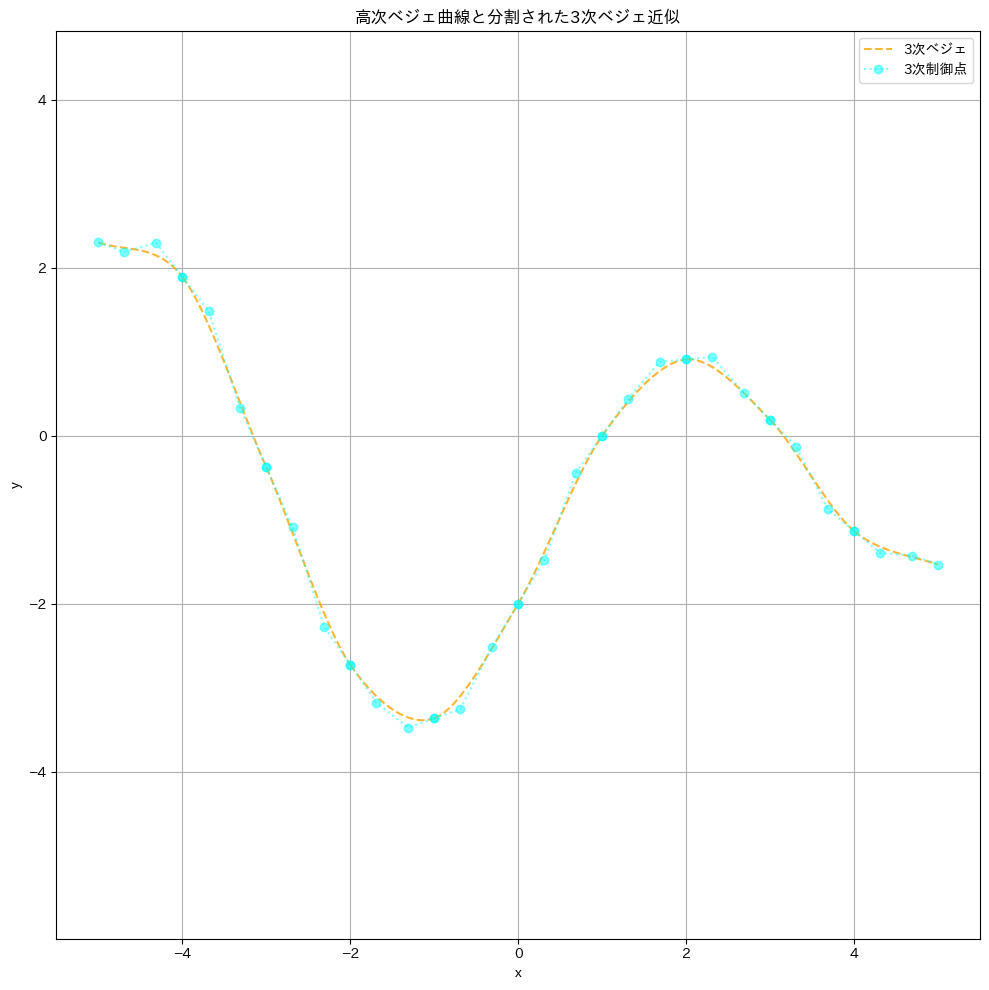

In [4]:
# json_data = json.loads("""
# [
#   {
#     "p3" : {
#       "x" : 0.17,
#       "y" : 0.8763066800438637
#     },
#     "p2" : {
#       "x" : 0.10699999999999998,
#       "y" : 0.7336681139476371
#     },
#     "p0" : {
#       "x" : 0,
#       "y" : 0
#     },
#     "p1" : {
#       "y" : 0.26329837765060454,
#       "x" : 0.058
#     }
#   },
#   {
#     "p1" : {
#       "x" : 0.23300000000000004,
#       "y" : 1.0189452461400903
#     },
#     "p2" : {
#       "y" : 1.01894524614009,
#       "x" : 0.267
#     },
#     "p3" : {
#       "y" : 0.8763066800438635,
#       "x" : 0.33
#     },
#     "p0" : {
#       "x" : 0.17,
#       "y" : 0.8763066800438637
#     }
#   },
#   {
#     "p2" : {
#       "x" : 0.4435,
#       "y" : 0.2852750594858644
#     },
#     "p1" : {
#       "x" : 0.393,
#       "y" : 0.7336681139476369
#     },
#     "p3" : {
#       "y" : 1.2246467991473532e-16,
#       "x" : 0.5
#     },
#     "p0" : {
#       "y" : 0.8763066800438635,
#       "x" : 0.33
#     }
#   },
#   {
#     "p1" : {
#       "y" : -0.2852750594858642,
#       "x" : 0.5565
#     },
#     "p2" : {
#       "y" : -0.7430866918770342,
#       "x" : 0.6134999999999999
#     },
#     "p0" : {
#       "x" : 0.5,
#       "y" : 1.2246467991473532e-16
#     },
#     "p3" : {
#       "x" : 0.67,
#       "y" : -0.8763066800438636
#     }
#   },
#   {
#     "p3" : {
#       "x" : 0.8300000000000001,
#       "y" : -0.8763066800438634
#     },
#     "p1" : {
#       "y" : -1.009526668210693,
#       "x" : 0.7265000000000001
#     },
#     "p0" : {
#       "x" : 0.67,
#       "y" : -0.8763066800438636
#     },
#     "p2" : {
#       "x" : 0.7670000000000001,
#       "y" : -1.0189452461400896
#     }
#   },
#   {
#     "p0" : {
#       "x" : 0.8300000000000001,
#       "y" : -0.8763066800438634
#     },
#     "p2" : {
#       "x" : 0.942,
#       "y" : -0.2632983776506048
#     },
#     "p3" : {
#       "x" : 1,
#       "y" : -2.4492935982947064e-16
#     },
#     "p1" : {
#       "x" : 0.893,
#       "y" : -0.7336681139476371
#     }
#   }
# ]
# """)

result = subprocess.run(["swift", "run","2d.swift"])

with open('cubic_segments.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# plot
cubic_beziers = []
for segment in json_data:
    p0 = segment['p0']
    p1 = segment['p1']
    p2 = segment['p2']
    p3 = segment['p3']
    cubic_beziers.append(((p0['x'], p0['y']), (p1['x'], p1['y']), (p2['x'], p2['y']), (p3['x'], p3['y'])))
plot_combined(cubic_beziers)